# <u>AI - Projet</u>
<b>Nom:</b> <i>'breast-cancer-wisconsin-data'</i> <br>
<b>Fichier source:</b> <i>'./data.csv'</i> <br>
<b>URL source:</b> <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">vers Kaggle.com...</a><br>
<b>Description:</b> <i>'Ce programme détecte le cancer du sein, selon des données.'</i> <br>
<b>Réalisé par:</b> <i>'Dong Ling et Samuel Bourassa'</i>
<hr>

In [2]:
#Importation des librairies requises
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Création du jeu de données
#Lire le fichier formaté csv dans un jeu de données pandas
df = pd.read_csv('data.csv')

### <u>Exploration du jeu de données</u>

In [5]:
#Affiche les 5 premières valeurs du dataframe
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#Informations sur le dataframe [df]
print('Informations sur le dataframe [df]:\n')
print(df.info(verbose=True))

Informations sur le dataframe [df]:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    fl

In [7]:
#Notes
print('\n***Notes:\nNous avons:\nNombre de rangées:', len(df.index), '\nNombre de colonnes:', df.shape[1],
      '\nNombre denregistrements:', df.size,
      '\n-la colonne [id] est inutile pour établir un diagnosis.\n-la colonne [diagnosis] est celle à prédire.\n-la colonne [Unnamed: 32] contient des valeurs manquantes NaN.\n-il faudra convertir la colonne [diagnosis], de [Dtype: object] en [Dtype: int32].')



***Notes:
Nous avons:
Nombre de rangées: 569 
Nombre de colonnes: 33 
Nombre denregistrements: 18777 
-la colonne [id] est inutile pour établir un diagnosis.
-la colonne [diagnosis] est celle à prédire.
-la colonne [Unnamed: 32] contient des valeurs manquantes NaN.
-il faudra convertir la colonne [diagnosis], de [Dtype: object] en [Dtype: int32].


<hr>

### <u>Exploration des valeurs manquantes</u>

In [8]:
#Compte total des valeurs manquantes(NaN, NAN, na) dans chaque colonnes
print('Colonnes avec quantité de valeurs manquantes:')
print(df.isna().sum())
print('\nNous voyons que la colonne [Unnamed: 32] contient 569 valeurs manquantes.')

#Nous voyons que la colonne [Unnamed: 32] contient 569 valeurs manquantes.

Colonnes avec quantité de valeurs manquantes:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst          


#### <u>[drop]</u> les colonnes [<i>id</i>] et [<i>Unnamed: 32</i>]

In [9]:
#Notes

#[drop] toutes les [colonnes] avec des valeurs manquantes et inutiles.
df.drop(columns=df.columns[0], axis=1, inplace=True)
df = df.dropna(axis=1)

In [10]:
#Informations sur le nouveau dataframe [df]
print('Informations sur le nouveau dataframe [df]:\n')
print(df.info(verbose=True))
print('***Notes:\nNous avons:\nNombre de rangées:', len(df.index), '\nNombre de colonnes:', df.shape[1],
      '\nNombre denregistrements:', df.size)

Informations sur le nouveau dataframe [df]:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-nu

<hr>

### <u>Exploration de la colonne [diagnosis], la valeur à prédire</u>

In [11]:
#Exploration de la colonne diagnosis, la valeur à prédire
print('Totaux des diagnostiques:')
print(df['diagnosis'].value_counts())
print('Total de diagnosis "malign" :', sum(df['diagnosis'] == 'M'))
print('Total de diagnosis "benign" :', sum(df['diagnosis'] == 'B'))

Totaux des diagnostiques:
B    357
M    212
Name: diagnosis, dtype: int64
Total de diagnosis "malign" : 212
Total de diagnosis "benign" : 357


#### <u>Visualisation de la colonne [diagnosis]</u>

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

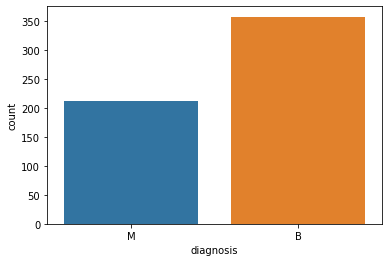

In [12]:
sns.countplot(df['diagnosis'], label='count')

#### <u>Encodage de la colonne [diagnosis]</u>

In [13]:
print(df.dtypes)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [14]:
#Encoder les valeurs catégoricales.
from sklearn.preprocessing import LabelEncoder

labelEncoder_Y = LabelEncoder()
df.iloc[:,0] = labelEncoder_Y.fit_transform(df.iloc[:,0].values)
print('les valeurs de la colonne [diagnosis] sont transformées: \n[M=1] et [B=0]')
print(df.iloc[:,0])

les valeurs de la colonne [diagnosis] sont transformées: 
[M=1] et [B=0]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


<hr>

#### <u>Création d'un pair plot</u>

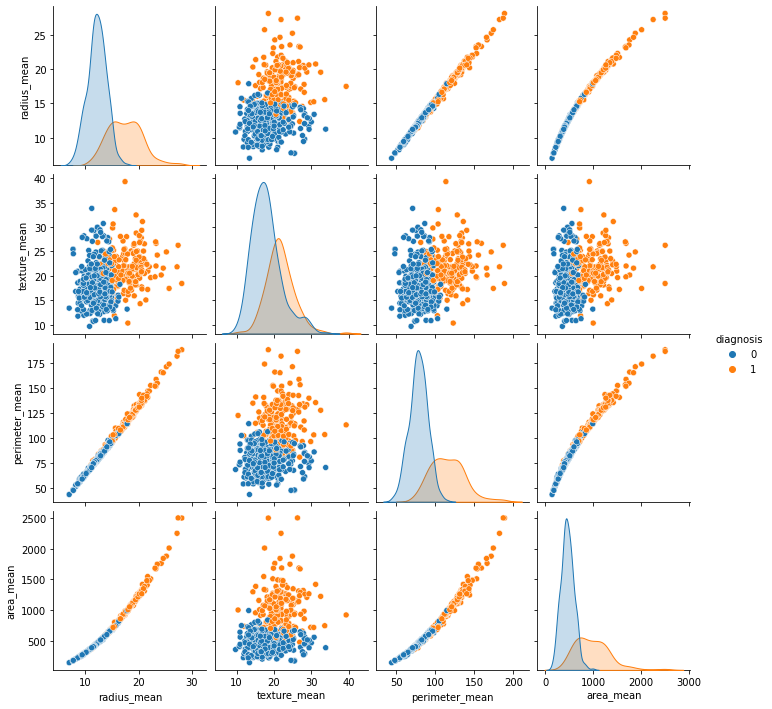

In [15]:
sns.pairplot(df.iloc[:,:5], hue='diagnosis')

In [16]:
#Affiche les 5 premières valeurs du nouveau dataframe [df]
print('[df]\n', df.head(),'\n[id], [diagnosis] et [Unnamed: 32] mis-a-jours.')
print('Nombre de rangées:', len(df.index), '\nNombre de colonnes:', df.shape[1],
      '\nNombre denregistrements:', df.size)

[df]
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38    

<hr>

### Corrélation

In [17]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


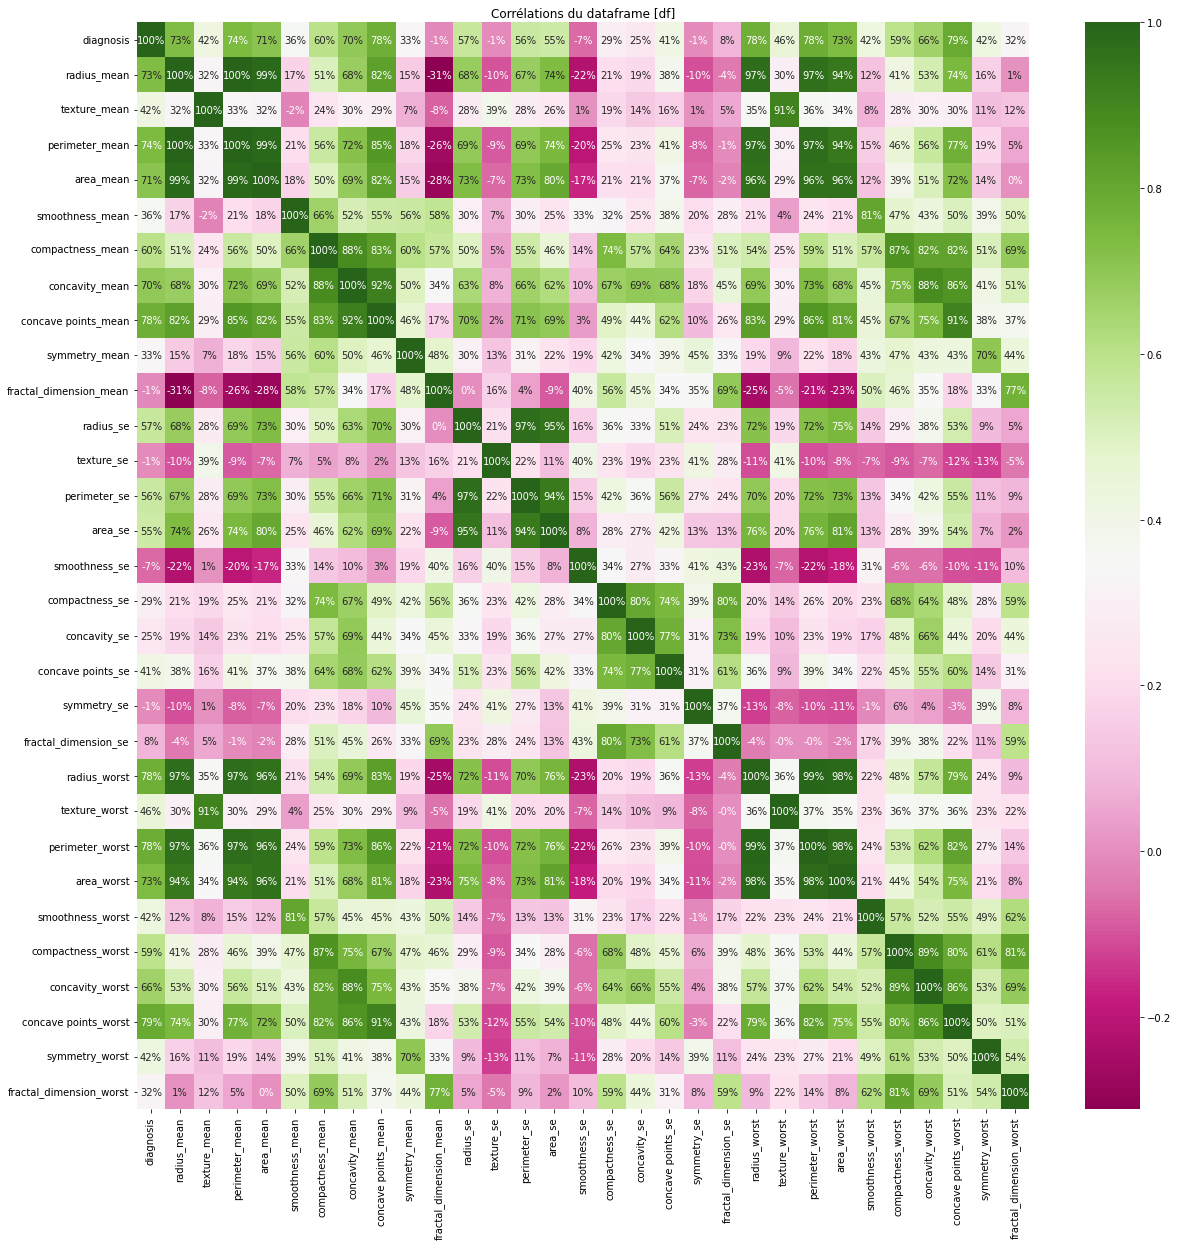

In [18]:
#Visualisation de la corrélation
plt.figure(figsize=(20,20))
ax = plt.axes()
sns.heatmap(df.corr(), annot=True, fmt='.0%', ax=ax, cmap="PiYG")
ax.set_title('Corrélations du dataframe [df]')
plt.show()

### <u>[split] des données...</u>
#### ...en données[X] indépendantes et données [Y] dépendantes

In [19]:
X = df.iloc[:,1:31].values #données indépendantes
Y = df.iloc[:,0].values #données dépendantes
print('[X] et [Y] sont de type [ndarray] :\nX = ', type(X), '\nY = ', type(Y))

[X] et [Y] sont de type [ndarray] :
X =  <class 'numpy.ndarray'> 
Y =  <class 'numpy.ndarray'>


In [20]:
# [split] des données en un set 80% training et un set 20% testing, avec un [random_state=44]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 44)

In [21]:
# [scale] les données (Feature scaling)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [22]:
#Create a function for the models
def models(X_train, Y_train):

    #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 44)
    log.fit(X_train, Y_train)

    #Using KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 44)
    svc_lin.fit(X_train, Y_train)

    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 44)
    svc_rbf.fit(X_train, Y_train)

    #Using GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 44)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 44)
    forest.fit(X_train, Y_train)
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [23]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9846153846153847
[1]K Nearest Neighbor Training Accuracy: 0.9846153846153847
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9868131868131869
[4]Gaussian Naive Bayes Training Accuracy: 0.9274725274725275
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


In [24]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print('Modele', i)
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    print(cm)
    print('Testing Accuracy = ', (TP + TN) / (TP + TN + FN + FP))
    print()

Modele 0
[[74  1]
 [ 0 39]]
Testing Accuracy =  0.9912280701754386

Modele 1
[[74  1]
 [ 3 36]]
Testing Accuracy =  0.9649122807017544

Modele 2
[[75  0]
 [ 1 38]]
Testing Accuracy =  0.9912280701754386

Modele 3
[[74  1]
 [ 0 39]]
Testing Accuracy =  0.9912280701754386

Modele 4
[[72  3]
 [ 2 37]]
Testing Accuracy =  0.956140350877193

Modele 5
[[72  3]
 [ 2 37]]
Testing Accuracy =  0.956140350877193

Modele 6
[[73  2]
 [ 2 37]]
Testing Accuracy =  0.9649122807017544



In [25]:
#Autre facon d'aller chercher les metriques des modeles
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
    print('Modele', i)
    print(classification_report(Y_test, model[i].predict(X_test)))
    print(accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Modele 0
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

0.9912280701754386

Modele 1
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        75
           1       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

0.9649122807017544

Modele 2
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.97      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighte

In [26]:
#Utilisation du modèle de prédictions choisit
#Avec un [random_state = 44], le modèle choisit serait Logistic Regression.
print('Avec un [random_state = 44], le modèle choisit serait:\n[Logistic Regression], avec une précision 99,12%.')
pred = model[0].predict(X_test)
print(pred)
print()
print(Y_test)
print(len(pred))



Avec un [random_state = 44], le modèle choisit serait:
[Logistic Regression], avec une précision 99,12%.
[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1]

[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1]
114
